<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL_Model_08_04_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/doughagey/UnderstatScraper

Cloning into 'UnderstatScraper'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 11), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (34/34), 268.30 KiB | 4.97 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '1wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '32'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table,'6wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '32'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table, '1wks')

print('Merging Tables')
EPL_player_df = pd.merge(one_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, one_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 1 matches
Merging Tables
Writing CSV File


In [3]:
EPL_player_df = EPL_player_df.round(2)
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,25,2119,19,23.55790687352419,5,4.456133211031556,98,26,...,98,26,1,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349
1,8865,Ollie Watkins,31,2727,18,17.29269641637802,10,5.971460225060582,91,39,...,91,39,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037
2,1250,Mohamed Salah,25,2086,17,17.75582455098629,9,10.93062936514616,91,55,...,91,55,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548
3,1679,Dominic Solanke,31,2780,16,18.113537084311247,3,2.9649082981050014,90,34,...,90,34,3,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108
4,8497,Cole Palmer,27,2015,16,12.20286419056356,9,8.724737323820591,77,52,...,77,52,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,12455,Jayden Danns,2,6,0,0,0,0,0,0,...,0,0,1,0,S,Liverpool,0,0,0,0
548,12498,Valentín Barco,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Brighton,0,0,0,0
549,12509,Daiki Hashioka,6,320,0,0.10021312907338142,0,0.12914061546325684,2,1,...,2,1,0,0,D S,Luton,0,0.10021312907338142,1.570974387228489,1.407723881304264
550,12532,Leon Chiwome,3,178,0,0.14485104009509087,0,0,2,0,...,2,0,0,0,F S,Wolverhampton Wanderers,0,0.14485104009509087,0.05850440636277199,0.013132527470588684


In [4]:
one_game_df.to_csv('one_game_df.csv', encoding='utf-8', index=False)
one_game_df['time'] = one_game_df['time'].astype(int)
one_game_df = one_game_df[one_game_df['time'] > 40]
one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
one_game_df['xgdifference'] = one_game_df.goals_1wks - one_game_df.xG_1wks
one_game_df['assists_1wks'] = one_game_df['assists_1wks'].astype(int)
one_game_df['xA_1wks'] = one_game_df['xA_1wks'].astype(float)
one_game_df['xAdifference'] = one_game_df.assists_1wks - one_game_df.xA_1wks
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

<ipython-input-4-30b8c2331977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
<ipython-input-4-30b8c2331977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
<ipython-input-4-30b8c2331977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
11,10720,Darwin Núñez,29,11,17.713011,8,5.469840,100,30,F S,Liverpool,11,16.951841683126986,23.371195789426565,4.647672396153212,-6.713011,2.530160
62,5555,Dominic Calvert-Lewin,27,5,10.969386,1,1.958060,60,17,F S,Everton,4,10.208216808736324,9.277972742915154,0.9367627296596766,-5.969386,-0.958060
19,10048,Nicolas Jackson,27,9,14.531643,3,4.505322,57,25,F M S,Chelsea,9,14.53164272941649,20.91573864221573,5.089306462556124,-5.531643,-1.505322
0,8260,Erling Haaland,25,19,23.557907,5,4.456133,98,26,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349,-4.557907,0.543867
68,10760,Brennan Johnson,28,5,9.075109,7,5.196743,42,32,F M S,"Nottingham Forest,Tottenham",5,9.075109332799911,15.738085836172104,2.361588776111603,-4.075109,1.803257
169,10809,Keane Lewis-Potter,25,2,5.840816,1,1.549906,33,12,D F S,Brentford,2,5.84081557393074,6.459903618320823,1.1794642806053162,-3.840816,-0.549906
29,10846,Julián Álvarez,30,8,11.443823,7,5.633975,86,61,F M S,Manchester City,7,10.682654447853565,22.788067266345024,10.670460879802704,-3.443823,1.366025
113,9983,Beto,26,3,6.070627,0,1.194241,38,11,F S,Everton,3,5.309458554256707,6.236657006666064,0.9809153787791729,-3.070627,-1.194241
120,11356,Enzo Fernández,27,3,6.068360,2,3.558831,46,32,M S,Chelsea,2,4.546022052876651,18.208850547671318,12.498781157657504,-3.068360,-1.558831
79,5543,Gabriel Jesus,21,4,6.825644,3,3.031161,49,24,F S,Arsenal,4,6.825643606483936,12.749569993466139,4.21037820354104,-2.825644,-0.031161


In [5]:
sortXgDifference.tail(10)

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
63,6456,Callum Hudson-Odoi,23,5,1.991746,1,2.036069,23,24,F M S,Nottingham Forest,5,1.9917459338903427,8.746292222291231,5.137038379907608,3.008254,-1.036069
21,11718,Elijah Adebayo,23,9,5.984736,0,0.813662,28,14,F M S,Luton,9,5.984735639765859,7.635232524946332,1.9411640595644712,3.015264,-0.813662
16,6854,Diogo Jota,19,9,5.927468,3,2.599801,36,21,F S,Liverpool,9,5.927467778325081,10.80069451034069,5.218722354620695,3.072532,0.400199
22,5221,Leon Bailey,30,8,4.836311,8,8.171438,47,42,F M S,Aston Villa,8,4.836311269551516,15.209489304572344,6.521849470213056,3.163689,-0.171438
6,1776,Jarrod Bowen,31,15,11.267851,5,5.373290,71,28,F M,West Ham,15,11.267850514501333,14.659686800092459,2.457054629921913,3.732149,-0.373290
4,8497,Cole Palmer,27,16,12.202864,9,8.724737,77,52,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,3.797136,0.275263
10,4456,Chris Wood,25,12,8.162571,1,1.898128,31,20,F S,Nottingham Forest,12,8.162571374326944,10.093287898227572,0.5210605459287763,3.837429,-0.898128
48,5553,Declan Rice,31,6,1.979131,5,4.254965,41,33,M S,Arsenal,6,1.9791313698515296,14.976129206828773,12.997630544006824,4.020869,0.745035
8,6055,Phil Foden,30,14,9.582016,7,7.576777,90,61,F M S,Manchester City,14,9.582016134634614,25.509084045886993,14.022850481793284,4.417984,-0.576777
5,453,Son Heung-Min,28,15,10.355353,9,10.073620,71,52,F M S,Tottenham,14,9.594184577465057,24.02671529352665,9.098955666646361,4.644647,-1.073620


In [6]:
one_game_df

,id,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,25,2119,19,23.557907,5,4.456133,98,26,1,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349,-4.557907,0.543867
1,8865,Ollie Watkins,31,2727,18,17.292696,10,5.971460,91,39,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037,0.707304,4.028540
2,1250,Mohamed Salah,25,2086,17,17.755825,9,10.930629,91,55,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548,-0.755825,-1.930629
3,1679,Dominic Solanke,31,2780,16,18.113537,3,2.964908,90,34,3,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108,-2.113537,0.035092
4,8497,Cole Palmer,27,2015,16,12.202864,9,8.724737,77,52,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,3.797136,0.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,12409,Adam Wharton,9,731,0,0.102256,1,1.533579,3,13,1,0,M S,Crystal Palace,0,0.10225621610879898,2.2510339356958866,1.5096553042531013,-0.102256,-0.533579
546,12449,Oliver Arblaster,5,371,0,0.021724,0,0.321833,1,7,1,0,M S,Sheffield United,0,0.021724281832575798,1.6776133538223803,1.5905098379589617,-0.021724,-0.321833
549,12509,Daiki Hashioka,6,320,0,0.100213,0,0.129141,2,1,0,0,D S,Luton,0,0.10021312907338142,1.570974387228489,1.407723881304264,-0.100213,-0.129141
550,12532,Leon Chiwome,3,178,0,0.144851,0,0.000000,2,0,0,0,F S,Wolverhampton Wanderers,0,0.14485104009509087,0.05850440636277199,0.013132527470588684,-0.144851,0.000000


In [7]:
onegamedftidy = one_game_df.drop(columns=[
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
onegamedftidy

,id,player_name,games,xG_1wks,xA_1wks,position,team_title
0,8260,Erling Haaland,25,23.557907,4.456133,F S,Manchester City
1,8865,Ollie Watkins,31,17.292696,5.971460,F,Aston Villa
2,1250,Mohamed Salah,25,17.755825,10.930629,F S,Liverpool
3,1679,Dominic Solanke,31,18.113537,2.964908,F,Bournemouth
4,8497,Cole Palmer,27,12.202864,8.724737,F M S,"Chelsea,Manchester City"
...,...,...,...,...,...,...,...
544,12409,Adam Wharton,9,0.102256,1.533579,M S,Crystal Palace
546,12449,Oliver Arblaster,5,0.021724,0.321833,M S,Sheffield United
549,12509,Daiki Hashioka,6,0.100213,0.129141,D S,Luton
550,12532,Leon Chiwome,3,0.144851,0.000000,F S,Wolverhampton Wanderers


In [8]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


Cloning into 'fpl-mappers'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 94 (delta 32), reused 89 (delta 30), pack-reused 0
Receiving objects: 100% (94/94), 217.69 KiB | 6.80 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Cloning into 'FPL-ID-Map'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 301 (delta 216), reused 233 (delta 148), pack-reused 0
Receiving objects: 100% (301/301), 368.19 KiB | 10.52 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [9]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2,
                     data1,
                     on ='code',
                     how ='left')
understatid = understatwithfplid1.drop(columns=[
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
one_game_df.rename(columns={'id': 'understat'}, inplace=True)
one_game_df

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,25,2119,19,23.557907,5,4.456133,98,26,1,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349,-4.557907,0.543867
1,8865,Ollie Watkins,31,2727,18,17.292696,10,5.971460,91,39,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037,0.707304,4.028540
2,1250,Mohamed Salah,25,2086,17,17.755825,9,10.930629,91,55,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548,-0.755825,-1.930629
3,1679,Dominic Solanke,31,2780,16,18.113537,3,2.964908,90,34,3,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108,-2.113537,0.035092
4,8497,Cole Palmer,27,2015,16,12.202864,9,8.724737,77,52,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,3.797136,0.275263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,12409,Adam Wharton,9,731,0,0.102256,1,1.533579,3,13,1,0,M S,Crystal Palace,0,0.10225621610879898,2.2510339356958866,1.5096553042531013,-0.102256,-0.533579
546,12449,Oliver Arblaster,5,371,0,0.021724,0,0.321833,1,7,1,0,M S,Sheffield United,0,0.021724281832575798,1.6776133538223803,1.5905098379589617,-0.021724,-0.321833
549,12509,Daiki Hashioka,6,320,0,0.100213,0,0.129141,2,1,0,0,D S,Luton,0,0.10021312907338142,1.570974387228489,1.407723881304264,-0.100213,-0.129141
550,12532,Leon Chiwome,3,178,0,0.144851,0,0.000000,2,0,0,0,F S,Wolverhampton Wanderers,0,0.14485104009509087,0.05850440636277199,0.013132527470588684,-0.144851,0.000000


In [10]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

Cloning into 'FPL-API-Fixture-modeler'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 147 (delta 15), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (147/147), 13.39 MiB | 21.59 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [11]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2154,11301,695.0
2155,11146,632.0
2159,11189,646.0
2161,11302,696.0


In [12]:
new_df

,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2154,11301,695.0
2155,11146,632.0
2159,11189,646.0
2161,11302,696.0


In [13]:
one_game_df["understat"] = one_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(one_game_df,
                     understatid2,
                     on ='understat',
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,...,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,8260,Erling Haaland,25,2119,19,23.557907,5,4.456133,98,26,...,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349,-4.557907,0.543867,318.0
1,8865,Ollie Watkins,31,2727,18,17.292696,10,5.971460,91,39,...,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037,0.707304,4.028540,40.0
2,1250,Mohamed Salah,25,2086,17,17.755825,9,10.930629,91,55,...,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548,-0.755825,-1.930629,283.0
3,1679,Dominic Solanke,31,2780,16,18.113537,3,2.964908,90,34,...,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108,-2.113537,0.035092,66.0
4,8497,Cole Palmer,27,2015,16,12.202864,9,8.724737,77,52,...,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,3.797136,0.275263,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,12409,Adam Wharton,9,731,0,0.102256,1,1.533579,3,13,...,0,M S,Crystal Palace,0,0.10225621610879898,2.2510339356958866,1.5096553042531013,-0.102256,-0.533579,NaN
489,12449,Oliver Arblaster,5,371,0,0.021724,0,0.321833,1,7,...,0,M S,Sheffield United,0,0.021724281832575798,1.6776133538223803,1.5905098379589617,-0.021724,-0.321833,NaN
490,12509,Daiki Hashioka,6,320,0,0.100213,0,0.129141,2,1,...,0,D S,Luton,0,0.10021312907338142,1.570974387228489,1.407723881304264,-0.100213,-0.129141,NaN
491,12532,Leon Chiwome,3,178,0,0.144851,0,0.000000,2,0,...,0,F S,Wolverhampton Wanderers,0,0.14485104009509087,0.05850440636277199,0.013132527470588684,-0.144851,0.000000,NaN


In [14]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [16]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            float(x["expected_goals"]),  # Convert to float
            float(x["expected_assists"]),  # Convert to float
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "expected_goals", "expected_assists", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [17]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
master = playerdata
#master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
#master['BPS90'] = master.bps/(master.minutes/90)
master

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
0,1,Arsenal,F,Balogun,4.4,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
1,2,Arsenal,D,Cédric,3.8,0.5,0.00,0.02,0,0,15,0.6,3,1.0,59,2,3
2,3,Arsenal,M,M.Elneny,4.4,0.1,0.08,0.01,0,1,16,1.6,6,2.0,25,2,3
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1.20,0.59,1,3,67,23.8,23,2.3,282,2,3
4,5,Arsenal,D,Gabriel,5.4,27.3,4.08,0.56,3,1,537,105.6,121,4.2,2444,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,788,Wolverhampton Wanderers,D,Mosquera,4.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
842,800,Wolverhampton Wanderers,M,N.Lemina,5.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
843,832,Wolverhampton Wanderers,D,Okoduwa,4.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
844,836,Wolverhampton Wanderers,F,Chiwome,4.5,0.0,0.10,0.02,0,0,12,2.2,5,1.7,173,2,3


In [24]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw33 = homesawayspi.query('Event=="33.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw33['League_Average']  = laverage
gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw33['home_difference'] = gw33.HomeSPI - gw33.League_Average
gw33['away_difference'] = gw33.AwaySPI - gw33.League_Average


# Assuming gw33 is your DataFrame
gw33['home_adjustment'] = (gw33.home_difference + gw33.League_Average) / gw33.League_Average
gw33['away_adjustment'] = (gw33.away_difference + gw33.League_Average) / gw33.League_Average

# Creating DataFrame for home adjustments
home_adjustments = gw33[['team_h', 'home_adjustment']].rename(columns={'team_h': 'team'}).copy()

# Creating DataFrame for away adjustments
away_adjustments = gw33[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team'}).copy()

# Concatenating home and away adjustments
gw33adjustments = pd.concat([home_adjustments, away_adjustments], ignore_index=True)


<ipython-input-24-bcce1f8b2be0>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PLSPI['League Average']  = PLSPI["spi"].mean()
<ipython-input-24-bcce1f8b2be0>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw33['League_Average']  = laverage
<ipython-input-24-bcce1f8b2be0>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [25]:
rawdf = pd.merge(master,
                     gw33adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.expected_goals * 4/32)+(rawfwd.expected_assists * 3/32) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.expected_goals * 5/32)+(rawmd.expected_assists * 3/32) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/32))/4
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
#rawgk['xP'] = rawgk.apppoint * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.expected_goals * 6/32)+(rawdef.expected_assists * 3/32) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
#rawdef['xP'] = ((rawdef.expected_goals * 6/3)+(rawdef.expected_assists * 3/3) + (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
 'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-25-cb1cc25e5361>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwd['xP'] = ((rawfwd.expected_goals * 4/32)+(rawfwd.expected_assists * 3/32) + (rawfwd.apppoint)) * rawfwd.home_adjustment
<ipython-input-25-cb1cc25e5361>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmd['xP'] = ((rawmd.expected_goals * 5/32)+(rawmd.expected_assists * 3/32) + (rawmd.apppoint)) * rawmd.home_adjustment
<ipython-input-25-cb1cc25e5361>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,id,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,away_adjustment,xP,xCSP
0,1,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,NaN,2.332358,NaN
1,8,F,G.Jesus,7.7,2.7,4,5,222,134.7,71,3.4,1271,NaN,3.464281,NaN
2,13,F,Nketiah,5.1,3.3,5,4,206,76.6,70,2.7,1062,NaN,3.068144,NaN
3,39,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,1.101978,NaN,NaN
4,44,F,Duran,5.0,0.2,3,1,99,28.6,33,1.8,335,1.101978,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,NaN,1.192144,-0.79375
842,546,G,Bentley,3.9,0.9,0,0,65,6.6,17,4.2,292,0.820717,NaN,-0.60625
843,564,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,0.820717,NaN,-0.60625
844,569,G,José Sá,5.0,1.9,0,0,473,67.1,84,2.9,2497,0.820717,NaN,-0.60625


In [26]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,...,ict_index,points,points_per_game,minutes,apppoint,assistvalue,home_adjustment,away_adjustment,xGA,xCSP
15,17,Arsenal,G,Ramsdale,4.5,5.6,0.0,0.01,0,0,...,7.3,20,3.3,540,2,3,1.166179,NaN,21.3,0.334375
16,18,Arsenal,G,Rúnarsson,4.0,0.1,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,1.166179,NaN,21.3,0.334375
26,113,Arsenal,G,Raya,5.1,9.4,0.0,0.02,0,0,...,33.9,104,4.2,2250,2,3,1.166179,NaN,21.3,0.334375
30,646,Arsenal,G,Hein,4.0,0.1,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,1.166179,NaN,21.3,0.334375
54,49,Aston Villa,G,Martinez,5.3,12.1,0.0,0.01,0,0,...,72.8,102,3.4,2700,2,3,NaN,1.101978,48.2,-0.506250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,647,West Ham,G,Anang,4.0,0.1,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,0.988306,NaN,57.4,-0.793750
803,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0.0,0.00,0,0,...,6.6,17,4.2,292,2,3,NaN,0.820717,51.4,-0.606250
819,564,Wolverhampton Wanderers,G,King,3.9,0.7,0.0,0.00,0,0,...,0.0,0,0.0,0,2,3,NaN,0.820717,51.4,-0.606250
823,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0.0,0.00,0,0,...,67.1,84,2.9,2497,2,3,NaN,0.820717,51.4,-0.606250


In [27]:
from pandas import ExcelWriter

In [28]:
writer = ExcelWriter('notes.xlsx')

In [30]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw33adjustments.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [31]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Brighton,Chelsea,NaN
1,NaN,Manchester United,Newcastle United,NaN
2,NaN,Tottenham,Manchester City,NaN
3,1.0,Burnley,Manchester City,2023-08-11T19:00:00Z
4,1.0,Arsenal,Nottingham Forest,2023-08-12T12:00:00Z
...,...,...,...,...
375,38.0,Crystal Palace,Aston Villa,2024-05-19T15:00:00Z
376,38.0,Liverpool,Wolverhampton Wanderers,2024-05-19T15:00:00Z
377,38.0,Luton Town,Fulham,2024-05-19T15:00:00Z
378,38.0,Manchester City,West Ham,2024-05-19T15:00:00Z


In [32]:
rawdfallgw = pd.merge(master,
                     gw33adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/32)+(rawfwdallgw.expected_assists * 3/32) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/32)+(rawmdallgw.expected_assists * 3/32) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = ((4 - (epltabledef.xGA * 4/32))/4) + 0.75
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
#rawgkallgw['xPallgw'] = (rawgkallgw.apppoint)
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'expected_goals',
  'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/32)+(rawdefallgw.expected_assists * 3/32) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
#rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/3)+(rawdefallgw.expected_assists * 3/3) + (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-32-11093d9df021>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/32)+(rawfwdallgw.expected_assists * 3/32) + (rawfwdallgw.apppoint))
<ipython-input-32-11093d9df021>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/32)+(rawmdallgw.expected_assists * 3/32) + (rawmdallgw.apppoint))
<ipython-input-32-11093d9df021>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,away_adjustment,xPallgw,xCSP
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,1.166179,NaN,2.000000,NaN
1,8,Arsenal,F,G.Jesus,7.7,2.7,4,5,222,134.7,71,3.4,1271,1.166179,NaN,2.970625,NaN
2,13,Arsenal,F,Nketiah,5.1,3.3,5,4,206,76.6,70,2.7,1062,1.166179,NaN,2.630937,NaN
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,NaN,1.101978,2.000000,NaN
4,44,Aston Villa,F,Duran,5.0,0.2,3,1,99,28.6,33,1.8,335,NaN,1.101978,2.196563,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,0.988306,NaN,1.956250,-0.04375
842,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,17,4.2,292,NaN,0.820717,2.143750,0.14375
843,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,NaN,0.820717,2.143750,0.14375
844,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0,0,473,67.1,84,2.9,2497,NaN,0.820717,2.143750,0.14375


In [33]:
rawmdallgw

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,away_adjustment,xPallgw
2,3,Arsenal,M,M.Elneny,4.4,0.1,0,1,16,1.6,6,2.0,25,1.166179,NaN,2.013438
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1,3,67,23.8,23,2.3,282,1.166179,NaN,2.242812
5,6,Arsenal,M,Havertz,7.3,4.7,9,7,368,160.7,132,4.4,2016,1.166179,NaN,3.618750
7,9,Arsenal,M,Jorginho,5.3,0.2,0,2,172,35.2,41,2.0,883,1.166179,NaN,2.176875
9,11,Arsenal,M,Marquinhos,4.5,0.0,0,0,0,0.0,0,0.0,0,1.166179,NaN,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,750,Wolverhampton Wanderers,M,Chirewa,4.4,0.0,0,0,7,3.6,3,0.8,33,NaN,0.820717,2.013438
838,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0,0,0,0.0,0,0.0,0,NaN,0.820717,2.000000
839,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0,0,0,0.0,0,0.0,0,NaN,0.820717,2.000000
840,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0,0,0,0.0,0,0.0,0,NaN,0.820717,2.000000


In [34]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

,team,gw2adjustment
0,Burnley,0
1,Luton Town,0


In [35]:
#gw2adjustments = pd.concat([gw2adjustments, blanks2])
#gw2adjustments = gw2adjustments.reset_index(drop=True)
#gw2adjustments

In [36]:
##gw3blanks = [['Newcastle United', 0], ['Manchester United', 0], ['Brentford', 0], ['Brighton', 0]]

# Create the pandas DataFrame
##blanks = pd.DataFrame(gw3blanks, columns=['team', 'gw3adjustment'])
##blanks

In [43]:
gw33 = homesawayspi.query('Event=="33.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw33['League_Average']  = laverage
gw33.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw33['home_difference'] = gw33.HomeSPI - gw33.League_Average
gw33['away_difference'] = gw33.AwaySPI - gw33.League_Average
gw33['home_adjustment'] = (gw33.home_difference - gw33.away_difference + gw33.League_Average)/gw33.League_Average
gw33['away_adjustment'] = (gw33.away_difference - gw33.home_difference+ gw33.League_Average)/gw33.League_Average
gw33adjustments = pd.concat([gw33[['team_h', 'home_adjustment']], gw33[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw33adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw33adjustments.rename(columns = {'home_adjustment':'gw33adjustment'}, inplace = True)
gw33adjustments

,team,gw33adjustment
0,Newcastle United,1.160641
1,Brentford,1.285847
2,Burnley,0.750700
3,Manchester City,1.507494
4,Nottingham Forest,0.959284
5,Bournemouth,0.729022
6,Liverpool,1.145494
7,West Ham,1.040299
8,Arsenal,1.064201
9,Chelsea,1.168840


In [47]:
gw34 = homesawayspi.query('Event=="34.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw34['League_Average']  = laverage
gw34.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw34['home_difference'] = gw34.HomeSPI - gw34.League_Average
gw34['away_difference'] = gw34.AwaySPI - gw34.League_Average
gw34['home_adjustment'] = (gw34.home_difference - gw34.away_difference + gw34.League_Average)/gw34.League_Average
gw34['away_adjustment'] = (gw34.away_difference - gw34.home_difference+ gw34.League_Average)/gw34.League_Average
gw34adjustments = pd.concat([gw34[['team_h', 'home_adjustment']], gw34[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw34adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw34adjustments.rename(columns = {'home_adjustment':'gw34adjustment'}, inplace = True)
gw34adjustments = gw34adjustments.groupby('team', as_index=False)['gw34adjustment'].aggregate('sum')
gw34adjustments

,team,gw34adjustment
0,Arsenal,2.458579
1,Aston Villa,1.274035
2,Bournemouth,1.733191
3,Brentford,1.300994
4,Brighton,0.845473
5,Burnley,1.088520
6,Chelsea,0.886884
7,Crystal Palace,1.890219
8,Everton,1.822127
9,Fulham,0.781689


In [51]:
gw34blanks = [['Tottenham', 0]]

# Create the pandas DataFrame
blanks34 = pd.DataFrame(gw34blanks, columns=['team', 'gw34adjustment'])
blanks34

,team,gw34adjustment
0,Tottenham,0


In [52]:
gw34adjustments = pd.concat([gw34adjustments, blanks34])
gw34adjustments = gw34adjustments.reset_index(drop=True)
gw34adjustments

,team,gw34adjustment
0,Arsenal,2.458579
1,Aston Villa,1.274035
2,Bournemouth,1.733191
3,Brentford,1.300994
4,Brighton,0.845473
5,Burnley,1.088520
6,Chelsea,0.886884
7,Crystal Palace,1.890219
8,Everton,1.822127
9,Fulham,0.781689


In [53]:
gw35 = homesawayspi.query('Event=="35.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw35['League_Average']  = laverage
gw35.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw35['home_difference'] = gw35.HomeSPI - gw35.League_Average
gw35['away_difference'] = gw35.AwaySPI - gw35.League_Average
gw35['home_adjustment'] = (gw35.home_difference - gw35.away_difference + gw35.League_Average)/gw35.League_Average
gw35['away_adjustment'] = (gw35.away_difference - gw35.home_difference+ gw35.League_Average)/gw35.League_Average
gw35adjustments = pd.concat([gw35[['team_h', 'home_adjustment']], gw35[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw35adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw35adjustments.rename(columns = {'home_adjustment':'gw35adjustment'}, inplace = True)
gw35adjustments = gw35adjustments.groupby('team', as_index=False)['gw35adjustment'].aggregate('sum')
gw35adjustments

,team,gw35adjustment
0,Arsenal,1.163699
1,Aston Villa,1.048915
2,Bournemouth,0.704008
3,Brentford,1.187739
4,Brighton,1.295992
5,Burnley,0.775713
6,Chelsea,2.001668
7,Crystal Palace,1.072817
8,Everton,0.812261
9,Fulham,0.927183


In [54]:
gw26blanks = [['Chelsea', 0], ['Liverpool', 0], ['Nottingham Forest', 0], ['Tottenham', 0]]

blanks26 = pd.DataFrame(gw26blanks, columns=['team', 'gw26adjustment'])
blanks26

,team,gw26adjustment
0,Chelsea,0
1,Liverpool,0
2,Nottingham Forest,0
3,Tottenham,0


In [56]:
gw36 = homesawayspi.query('Event=="36.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw36['League_Average']  = laverage
gw36.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw36['home_difference'] = gw36.HomeSPI - gw36.League_Average
gw36['away_difference'] = gw36.AwaySPI - gw36.League_Average
gw36['home_adjustment'] = (gw36.home_difference - gw36.away_difference + gw36.League_Average)/gw36.League_Average
gw36['away_adjustment'] = (gw36.away_difference - gw36.home_difference+ gw36.League_Average)/gw36.League_Average
gw36adjustments = pd.concat([gw36[['team_h', 'home_adjustment']], gw36[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw36adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw36adjustments.rename(columns = {'home_adjustment':'gw36adjustment'}, inplace = True)
gw36adjustments = gw36adjustments.groupby('team', as_index=False)['gw36adjustment'].aggregate('sum')
gw36adjustments

,team,gw36adjustment
0,Arsenal,1.338236
1,Aston Villa,0.978044
2,Bournemouth,0.661764
3,Brentford,1.123955
4,Brighton,1.021956
5,Burnley,0.711512
6,Chelsea,1.064757
7,Crystal Palace,0.921903
8,Everton,1.113255
9,Fulham,0.876045


In [ ]:
gw26adjustments = pd.concat([gw26adjustments, blanks26])
gw26adjustments = gw26adjustments.reset_index(drop=True)
gw26adjustments

,team,gw26adjustment
0,Aston Villa,1.321978
1,Brighton,1.239712
2,Crystal Palace,1.146189
3,Manchester United,1.150914
4,Bournemouth,0.549481
5,Arsenal,1.003057
6,Wolverhampton Wanderers,1.034602
7,West Ham,0.916344
8,Nottingham Forest,0.678022
9,Everton,0.760288


In [57]:
gw37 = homesawayspi.query('Event=="37.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw37['League_Average']  = laverage
gw37.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw37['home_difference'] = gw37.HomeSPI - gw37.League_Average
gw37['away_difference'] = gw37.AwaySPI - gw37.League_Average
gw37['home_adjustment'] = (gw37.home_difference - gw37.away_difference + gw37.League_Average)/gw37.League_Average
gw37['away_adjustment'] = (gw37.away_difference - gw37.home_difference+ gw37.League_Average)/gw37.League_Average
gw37adjustments = pd.concat([gw37[['team_h', 'home_adjustment']], gw37[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw37adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw37adjustments.rename(columns = {'home_adjustment':'gw37adjustment'}, inplace = True)
gw37adjustments = gw37adjustments.groupby('team', as_index=False)['gw37adjustment'].aggregate('sum')
gw37adjustments

,team,gw37adjustment
0,Arsenal,1.067258
1,Aston Villa,0.935660
2,Bournemouth,0.755981
3,Brentford,1.244019
4,Brighton,0.960812
5,Burnley,0.872154
6,Chelsea,1.273063
7,Crystal Palace,1.200107
8,Everton,1.098108
9,Fulham,0.669546


In [58]:
gw38 = homesawayspi.query('Event=="38.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw38['League_Average']  = laverage
gw38.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw38['home_difference'] = gw38.HomeSPI - gw38.League_Average
gw38['away_difference'] = gw38.AwaySPI - gw38.League_Average
gw38['home_adjustment'] = (gw38.home_difference - gw38.away_difference + gw38.League_Average)/gw38.League_Average
gw38['away_adjustment'] = (gw38.away_difference - gw38.home_difference+ gw38.League_Average)/gw38.League_Average
gw38adjustments = pd.concat([gw38[['team_h', 'home_adjustment']], gw38[['team_a', 'away_adjustment']].rename(columns={'team_a': 'team_h', 'away_adjustment': 'home_adjustment'})], ignore_index=True)
gw38adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw38adjustments.rename(columns = {'home_adjustment':'gw38adjustment'}, inplace = True)
gw38adjustments = gw38adjustments.groupby('team', as_index=False)['gw38adjustment'].aggregate('sum')
gw38adjustments

,team,gw38adjustment
0,Arsenal,1.281956
1,Aston Villa,1.081155
2,Bournemouth,0.774880
3,Brentford,0.908840
4,Brighton,1.025013
5,Burnley,1.094634
6,Chelsea,1.225120
7,Crystal Palace,0.918845
8,Everton,0.718044
9,Fulham,1.177039


In [59]:
gw18blanks = [['Brentford', 0], ['Manchester City', 0]]

# Create the pandas DataFrame
blanks18 = pd.DataFrame(gw18blanks, columns=['team', 'gw18adjustment'])
blanks18

,team,gw18adjustment
0,Brentford,0
1,Manchester City,0


In [60]:
#gw18adjustments = pd.concat([gw18adjustments, blanks18])
#gw18adjustments = gw18adjustments.reset_index(drop=True)
#gw18adjustments

In [61]:
gwadjustments3337 = pd.merge(gw33adjustments,gw34adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw35adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw36adjustments, on ='team')
gwadjustments3337 = pd.merge(gwadjustments3337,gw37adjustments, on ='team')
gwadjustments3337

,team,gw33adjustment,gw34adjustment,gw35adjustment,gw36adjustment,gw37adjustment
0,Newcastle United,1.160641,1.142298,1.377007,1.288488,1.039188
1,Brentford,1.285847,1.300994,1.187739,1.123955,1.244019
2,Burnley,0.750700,1.088520,0.775713,0.711512,0.872154
3,Manchester City,1.507494,1.154527,1.498461,1.457745,1.330454
4,Nottingham Forest,0.959284,0.895778,0.501539,0.993886,0.726937
5,Bournemouth,0.729022,1.733191,0.704008,0.661764,0.755981
6,Liverpool,1.145494,2.500406,1.178012,1.163838,1.064340
7,West Ham,1.040299,0.967483,0.821988,0.935243,1.217338
8,Arsenal,1.064201,2.458579,1.163699,1.338236,1.067258
9,Chelsea,1.168840,0.886884,2.001668,1.064757,1.273063


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gwadjustments2428 is your dataframe containing the data

# Set 'team' column as index
gwadjustments337.set_index('team', inplace=True)

# Transpose the dataframe
df_transposed = gwadjustments2529.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for team in df_transposed.columns:
    ax.plot(df_transposed.index.str.replace('gw', ''), df_transposed[team], label=team)

# Customizing the plot
ax.set_title('Adjustments by Team')
ax.set_xlabel('Gameweek')
ax.set_ylabel('Adjustment Value')
ax.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'gwadjustments337' is not defined

In [63]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments3337,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw14adjustment_y':'gw14adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,minutes,home_adjustment,away_adjustment,xPallgw,xCSP,gw33adjustment,gw34adjustment,gw35adjustment,gw36adjustment,gw37adjustment
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,0,1.2,NaN,2.0,NaN,1.1,2.5,1.2,1.3,1.1
1,8,Arsenal,F,G.Jesus,7.7,2.7,4,5,222,134.7,...,1271,1.2,NaN,3.0,NaN,1.1,2.5,1.2,1.3,1.1
2,13,Arsenal,F,Nketiah,5.1,3.3,5,4,206,76.6,...,1062,1.2,NaN,2.6,NaN,1.1,2.5,1.2,1.3,1.1
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,0,NaN,1.1,2.0,NaN,0.9,1.3,1.0,1.0,0.9
4,44,Aston Villa,F,Duran,5.0,0.2,3,1,99,28.6,...,335,NaN,1.1,2.2,NaN,0.9,1.3,1.0,1.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,0,1.0,NaN,2.0,-0.0,1.0,1.0,0.8,0.9,1.2
842,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,292,NaN,0.8,2.1,0.1,1.0,1.6,1.0,0.5,0.8
843,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0,NaN,0.8,2.1,0.1,1.0,1.6,1.0,0.5,0.8
844,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0,0,473,67.1,...,2497,NaN,0.8,2.1,0.1,1.0,1.6,1.0,0.5,0.8


In [64]:
#gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
#gw3adjustments

In [65]:
rawdfgw228x['gw33'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw33adjustment)+2)
rawdfgw228x['gw34'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw34adjustment)+2)
rawdfgw228x['gw35'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw35adjustment)+2)
rawdfgw228x['gw36'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw36adjustment)+2)
rawdfgw228x['gw37'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw37adjustment)+2)

rawdfgw228x['5GW Total'] = rawdfgw228x.gw33 + rawdfgw228x.gw34 + rawdfgw228x.gw35 + rawdfgw228x.gw36 + rawdfgw228x.gw37
rawdfgw228x['3GW Total'] = rawdfgw228x.gw33 + rawdfgw228x.gw34 + rawdfgw228x.gw35
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw33adjustment',
  'gw34adjustment',
  'gw35adjustment',
  'gw36adjustment',
  'gw37adjustment'
  ])
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,NaN,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.7,2.7,4,5,222,134.7,...,NaN,3.0,NaN,3.10,4.50,3.20,3.30,3.10,17.20,10.80
2,13,Arsenal,F,Nketiah,5.1,3.3,5,4,206,76.6,...,NaN,2.6,NaN,2.66,3.50,2.72,2.78,2.66,14.32,8.88
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,3,1,99,28.6,...,1.1,2.2,NaN,2.18,2.26,2.20,2.20,2.18,11.02,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,NaN,2.0,-0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
842,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
843,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
844,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0,0,473,67.1,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36


In [66]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,NaN,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.7,2.7,4,5,222,134.7,...,NaN,3.0,NaN,3.10,4.50,3.20,3.30,3.10,17.20,10.80
2,13,Arsenal,F,Nketiah,5.1,3.3,5,4,206,76.6,...,NaN,2.6,NaN,2.66,3.50,2.72,2.78,2.66,14.32,8.88
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,3,1,99,28.6,...,1.1,2.2,NaN,2.18,2.26,2.20,2.20,2.18,11.02,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,NaN,2.0,-0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
842,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
843,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
844,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0,0,473,67.1,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36


In [68]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments3337.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [69]:
#from google.colab import drive
#drive.mount('/content/drive')

In [70]:
import shutil

In [71]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [72]:
rawdfgw228x.nlargest(50, '5GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
307,308,Liverpool,M,Salah,13.4,37.3,17,9,547,284.8,...,NaN,5.3,NaN,5.63,10.25,5.96,5.96,5.63,33.43,21.84
66,355,Manchester City,F,Haaland,14.3,71.8,19,7,583,236.3,...,NaN,4.9,NaN,6.35,5.48,6.35,6.35,5.77,30.30,18.18
119,19,Arsenal,M,Saka,8.9,55.1,14,10,653,303.2,...,NaN,4.8,NaN,5.08,9.00,5.36,5.64,5.08,30.16,19.44
52,293,Liverpool,F,Darwin,7.7,20.0,11,11,388,214.6,...,NaN,4.3,NaN,4.53,7.75,4.76,4.76,4.53,26.33,17.04
238,362,Chelsea,M,Palmer,6.1,45.2,16,10,621,244.4,...,NaN,4.5,NaN,5.00,4.25,7.00,4.75,5.25,26.25,16.25
341,353,Manchester City,M,Foden,8.3,36.7,14,7,707,290.0,...,NaN,4.0,NaN,5.00,4.40,5.00,5.00,4.60,24.00,14.40
477,5,Arsenal,D,Gabriel,5.4,27.3,3,1,537,105.6,...,NaN,3.9,1.1,4.09,6.75,4.28,4.47,4.09,23.68,15.12
305,303,Liverpool,M,Luis Díaz,7.6,11.7,8,6,359,207.9,...,NaN,3.9,NaN,4.09,6.75,4.28,4.28,4.09,23.49,15.12
65,343,Manchester City,F,J.Alvarez,6.4,16.8,8,10,548,238.2,...,NaN,3.9,NaN,4.85,4.28,4.85,4.85,4.47,23.30,13.98
30,211,Chelsea,F,N.Jackson,6.8,5.1,9,3,297,168.4,...,NaN,3.9,NaN,4.28,3.71,5.80,4.09,4.47,22.35,13.79


In [73]:
rawdfgw228x.nlargest(50, '3GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
307,308,Liverpool,M,Salah,13.4,37.3,17,9,547,284.8,...,NaN,5.3,NaN,5.63,10.25,5.96,5.96,5.63,33.43,21.84
119,19,Arsenal,M,Saka,8.9,55.1,14,10,653,303.2,...,NaN,4.8,NaN,5.08,9.00,5.36,5.64,5.08,30.16,19.44
66,355,Manchester City,F,Haaland,14.3,71.8,19,7,583,236.3,...,NaN,4.9,NaN,6.35,5.48,6.35,6.35,5.77,30.30,18.18
52,293,Liverpool,F,Darwin,7.7,20.0,11,11,388,214.6,...,NaN,4.3,NaN,4.53,7.75,4.76,4.76,4.53,26.33,17.04
238,362,Chelsea,M,Palmer,6.1,45.2,16,10,621,244.4,...,NaN,4.5,NaN,5.00,4.25,7.00,4.75,5.25,26.25,16.25
305,303,Liverpool,M,Luis Díaz,7.6,11.7,8,6,359,207.9,...,NaN,3.9,NaN,4.09,6.75,4.28,4.28,4.09,23.49,15.12
477,5,Arsenal,D,Gabriel,5.4,27.3,3,1,537,105.6,...,NaN,3.9,1.1,4.09,6.75,4.28,4.47,4.09,23.68,15.12
341,353,Manchester City,M,Foden,8.3,36.7,14,7,707,290.0,...,NaN,4.0,NaN,5.00,4.40,5.00,5.00,4.60,24.00,14.40
65,343,Manchester City,F,J.Alvarez,6.4,16.8,8,10,548,238.2,...,NaN,3.9,NaN,4.85,4.28,4.85,4.85,4.47,23.30,13.98
30,211,Chelsea,F,N.Jackson,6.8,5.1,9,3,297,168.4,...,NaN,3.9,NaN,4.28,3.71,5.80,4.09,4.47,22.35,13.79


In [74]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
307,308,Liverpool,M,Salah,13.4,37.3,17,9,547,284.8,...,NaN,5.3,NaN,5.63,10.25,5.96,5.96,5.63,33.43,21.84
66,355,Manchester City,F,Haaland,14.3,71.8,19,7,583,236.3,...,NaN,4.9,NaN,6.35,5.48,6.35,6.35,5.77,30.30,18.18
119,19,Arsenal,M,Saka,8.9,55.1,14,10,653,303.2,...,NaN,4.8,NaN,5.08,9.00,5.36,5.64,5.08,30.16,19.44
52,293,Liverpool,F,Darwin,7.7,20.0,11,11,388,214.6,...,NaN,4.3,NaN,4.53,7.75,4.76,4.76,4.53,26.33,17.04
238,362,Chelsea,M,Palmer,6.1,45.2,16,10,621,244.4,...,NaN,4.5,NaN,5.00,4.25,7.00,4.75,5.25,26.25,16.25
341,353,Manchester City,M,Foden,8.3,36.7,14,7,707,290.0,...,NaN,4.0,NaN,5.00,4.40,5.00,5.00,4.60,24.00,14.40
477,5,Arsenal,D,Gabriel,5.4,27.3,3,1,537,105.6,...,NaN,3.9,1.1,4.09,6.75,4.28,4.47,4.09,23.68,15.12
305,303,Liverpool,M,Luis Díaz,7.6,11.7,8,6,359,207.9,...,NaN,3.9,NaN,4.09,6.75,4.28,4.28,4.09,23.49,15.12
65,343,Manchester City,F,J.Alvarez,6.4,16.8,8,10,548,238.2,...,NaN,3.9,NaN,4.85,4.28,4.85,4.85,4.47,23.30,13.98
30,211,Chelsea,F,N.Jackson,6.8,5.1,9,3,297,168.4,...,NaN,3.9,NaN,4.28,3.71,5.80,4.09,4.47,22.35,13.79


In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

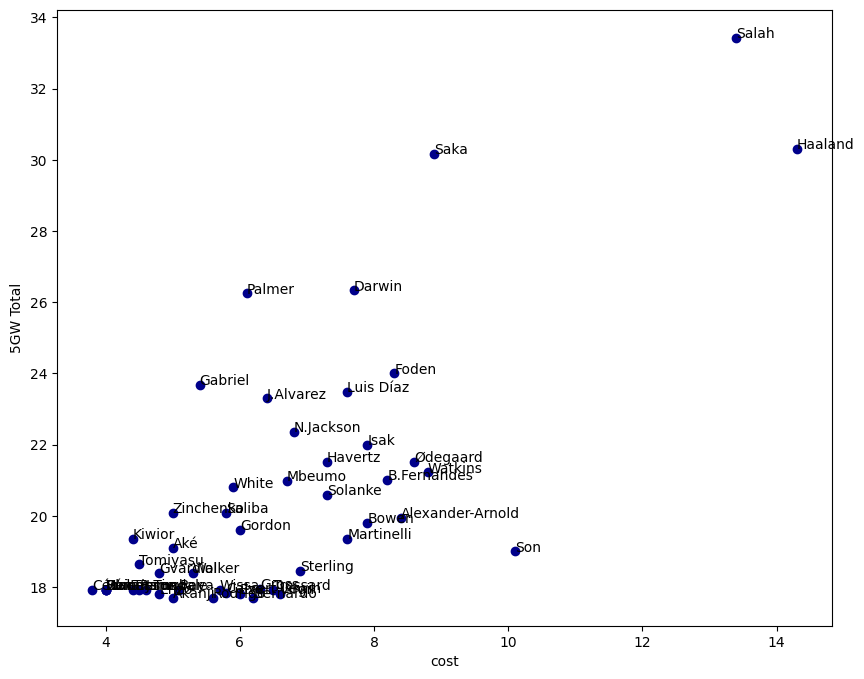

In [76]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

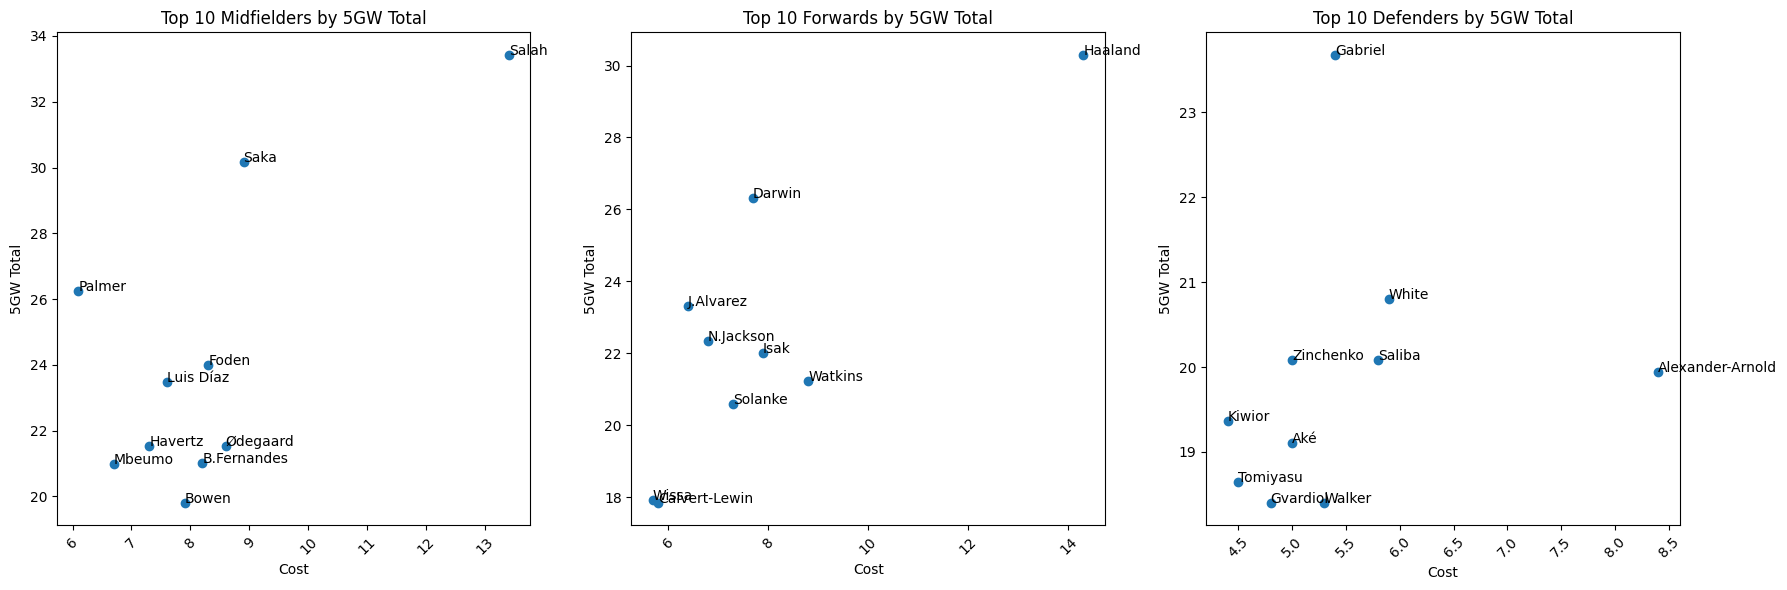

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Plotting the scatter plots
plt.figure(figsize=(18, 6))

# Midfielders scatter plot
plt.subplot(131)
plt.scatter(midfielders['cost'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in midfielders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Forwards scatter plot
plt.subplot(132)
plt.scatter(forwards['cost'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in forwards.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Defenders scatter plot
plt.subplot(133)
plt.scatter(defenders['cost'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in defenders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

plt.tight_layout()
plt.show()


In [78]:
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,away_adjustment,xPallgw,xCSP,gw33,gw34,gw35,gw36,gw37,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,NaN,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.7,2.7,4,5,222,134.7,...,NaN,3.0,NaN,3.10,4.50,3.20,3.30,3.10,17.20,10.80
2,13,Arsenal,F,Nketiah,5.1,3.3,5,4,206,76.6,...,NaN,2.6,NaN,2.66,3.50,2.72,2.78,2.66,14.32,8.88
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.2,3,1,99,28.6,...,1.1,2.2,NaN,2.18,2.26,2.20,2.20,2.18,11.02,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,NaN,2.0,-0.0,2.00,2.00,2.00,2.00,2.00,10.00,6.00
842,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
843,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36
844,569,Wolverhampton Wanderers,G,José Sá,5.0,1.9,0,0,473,67.1,...,0.8,2.1,0.1,2.10,2.16,2.10,2.05,2.08,10.49,6.36


In [79]:
apiplayers = master

In [80]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
519,355,Manchester City,F,Haaland,14.3,71.8,22.13,1.86,19,7,583,236.3,164,6.6,2102,2,3
17,19,Arsenal,M,Saka,8.9,55.1,12.52,9.32,14,10,653,303.2,191,6.6,2405,2,3
282,362,Chelsea,M,Palmer,6.1,45.2,12.05,6.12,16,10,621,244.4,182,6.7,2002,2,3
18,20,Arsenal,D,Saliba,5.8,39.8,1.54,0.79,2,1,627,81.0,131,4.2,2790,2,3
435,308,Liverpool,M,Salah,13.4,37.3,17.35,6.44,17,9,547,284.8,184,7.4,2054,2,3
517,353,Manchester City,M,Foden,8.3,36.7,8.92,6.20,14,7,707,290.0,183,6.1,2449,2,3
64,60,Aston Villa,F,Watkins,8.8,36.6,15.06,3.57,18,15,678,268.7,201,6.5,2704,2,3
751,516,Tottenham,M,Son,10.1,35.2,9.15,6.48,15,9,608,245.7,185,6.6,2340,2,3
102,85,Bournemouth,F,Solanke,7.3,28.9,17.21,1.75,16,3,461,234.2,149,4.8,2758,2,3
770,524,West Ham,G,Areola,4.2,28.4,0.00,0.00,0,0,519,84.3,106,3.9,2340,2,3


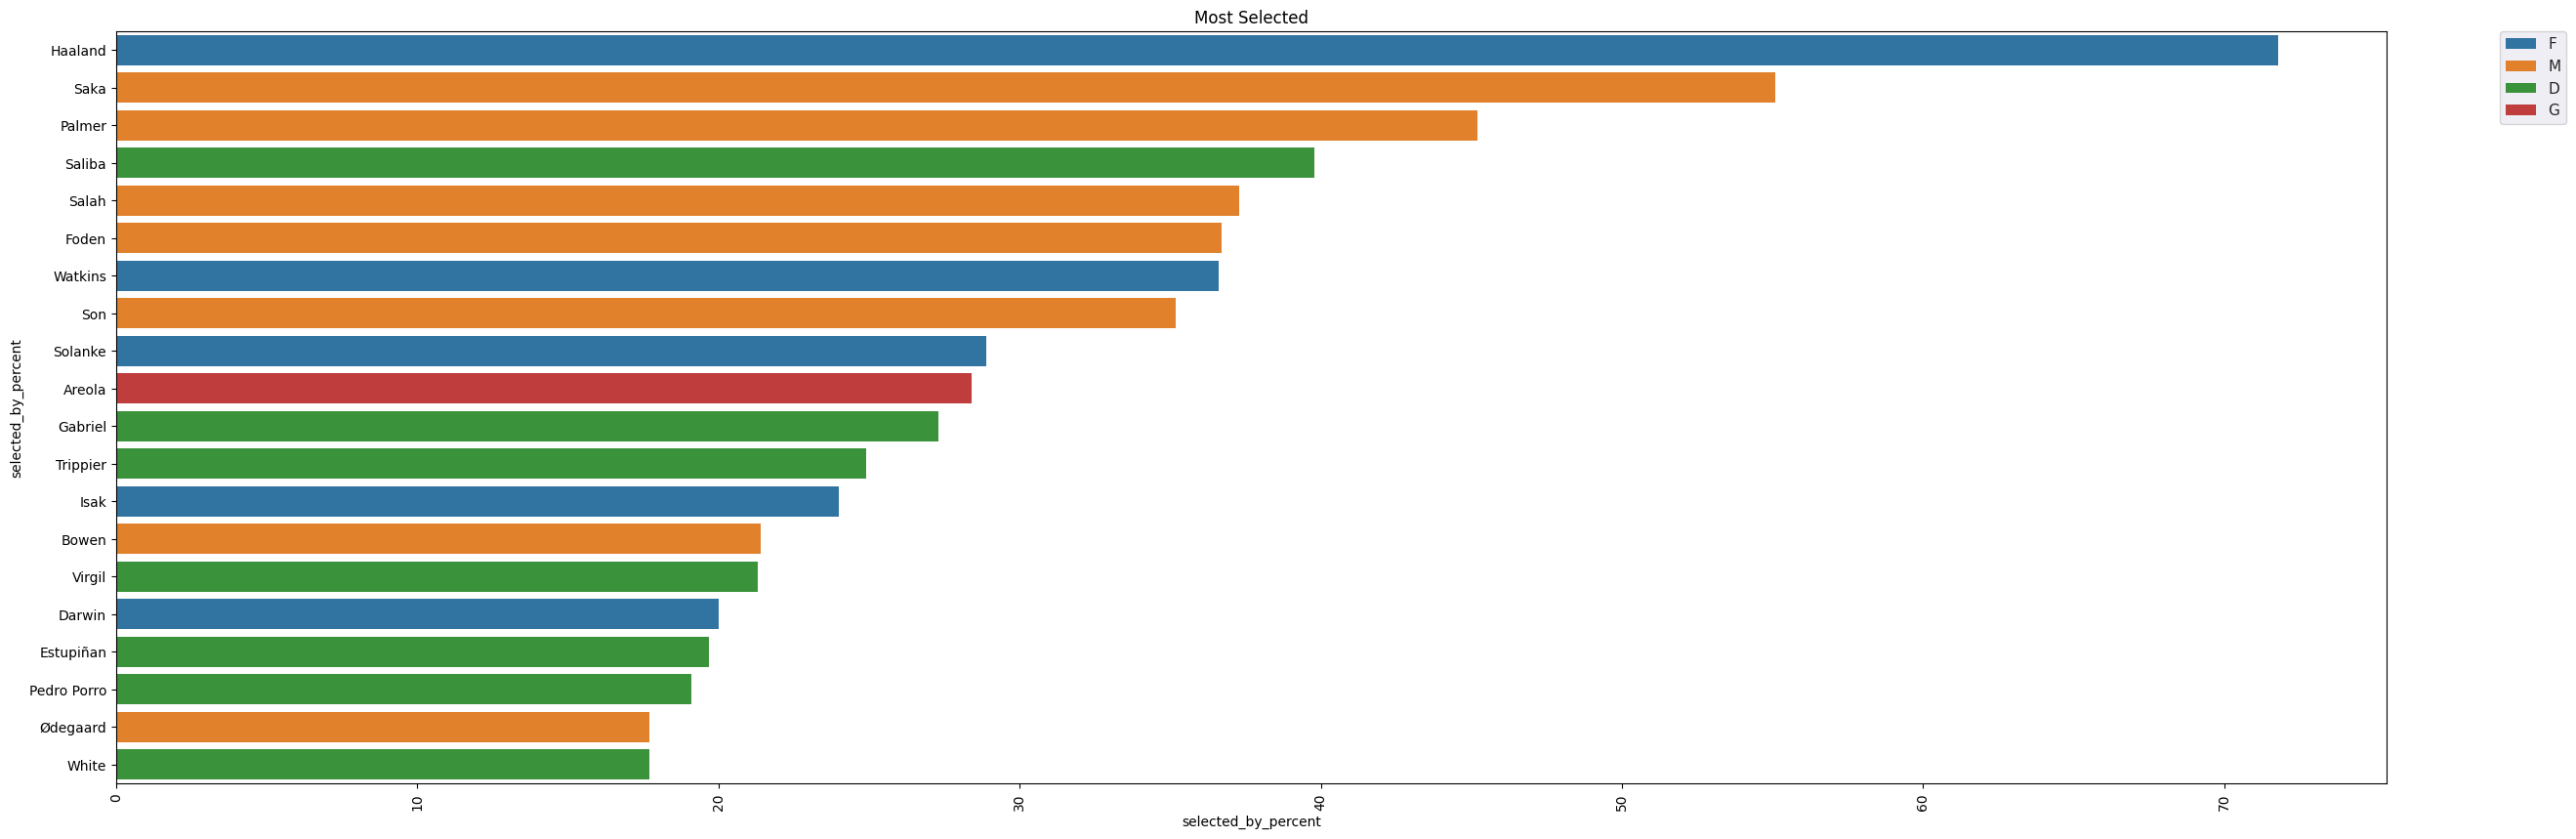

In [81]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [82]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/21))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Arsenal,31,22,5,4,75,24,51,71,2.29,61.3,21.3,40.0,1.29,-0.057143,1.977419,0.687097
1,2,Liverpool,31,21,8,2,72,30,42,71,2.29,70.7,36.2,34.5,1.11,-2.895238,2.280645,1.167742
2,3,Manchester City,31,21,7,3,71,31,40,70,2.26,62.9,30.1,32.8,1.06,-1.733333,2.029032,0.970968
3,4,Tottenham,31,18,6,7,65,45,20,60,1.94,54.6,50.0,4.6,0.15,-5.523810,1.761290,1.612903
4,5,Aston Villa,32,18,6,8,66,49,17,60,1.88,54.9,48.2,6.7,0.21,-5.180952,1.715625,1.506250
5,6,Manchester United,31,15,4,12,45,46,-1,49,1.58,46.0,57.3,-11.2,-0.36,-6.914286,1.483871,1.848387
6,7,West Ham,32,13,9,10,52,56,-4,48,1.50,45.1,57.4,-12.4,-0.39,-6.933333,1.409375,1.793750
7,8,Newcastle United,31,14,5,12,65,52,13,47,1.52,58.5,53.3,5.3,0.17,-6.152381,1.887097,1.719355
8,9,Chelsea,30,12,8,10,55,52,3,44,1.47,57.7,44.7,13.0,0.43,-4.514286,1.923333,1.490000
9,10,Brighton,31,11,10,10,51,49,2,43,1.39,47.6,45.4,2.2,0.07,-4.647619,1.535484,1.464516


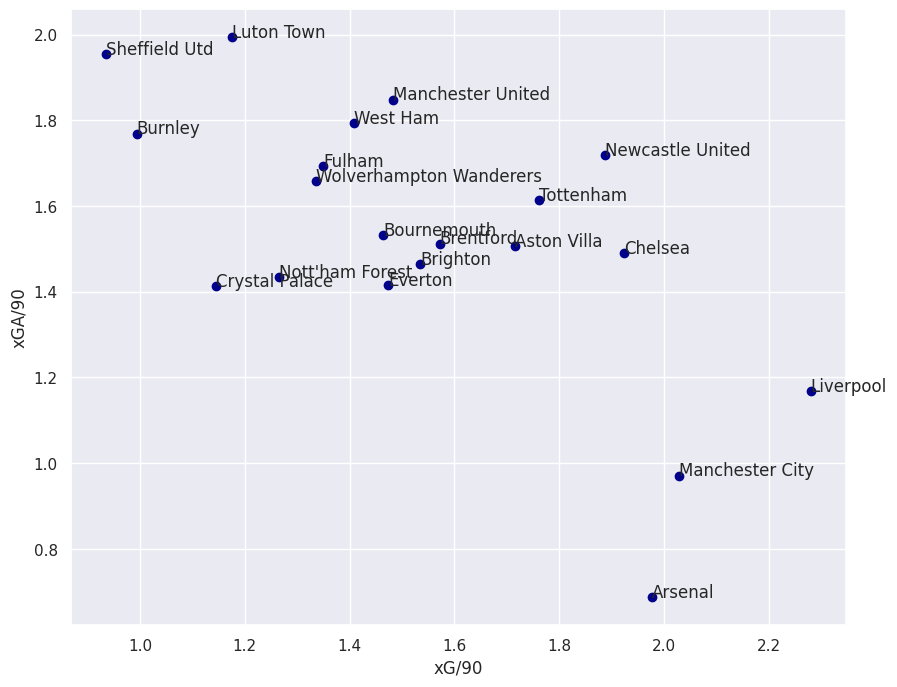

In [83]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [84]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,25,2119,19,23.55790687352419,5,4.456133211031556,98,26,...,98,26,1,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349
1,8865,Ollie Watkins,31,2727,18,17.29269641637802,10,5.971460225060582,91,39,...,91,39,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037
2,1250,Mohamed Salah,25,2086,17,17.75582455098629,9,10.93062936514616,91,55,...,91,55,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548
3,1679,Dominic Solanke,31,2780,16,18.113537084311247,3,2.9649082981050014,90,34,...,90,34,3,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108
4,8497,Cole Palmer,27,2015,16,12.20286419056356,9,8.724737323820591,77,52,...,77,52,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,12455,Jayden Danns,2,6,0,0,0,0,0,0,...,0,0,1,0,S,Liverpool,0,0,0,0
548,12498,Valentín Barco,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Brighton,0,0,0,0
549,12509,Daiki Hashioka,6,320,0,0.10021312907338142,0,0.12914061546325684,2,1,...,2,1,0,0,D S,Luton,0,0.10021312907338142,1.570974387228489,1.407723881304264
550,12532,Leon Chiwome,3,178,0,0.14485104009509087,0,0,2,0,...,2,0,0,0,F S,Wolverhampton Wanderers,0,0.14485104009509087,0.05850440636277199,0.013132527470588684


In [85]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals
0,8260,Erling Haaland,25,2119,19,23.55790687352419,5,4.456133211031556,98,26,...,26,1,0,F S,Manchester City,16,20.513231702148914,24.582677520811558,2.197779729962349,19
1,8865,Ollie Watkins,31,2727,18,17.29269641637802,10,5.971460225060582,91,39,...,39,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037,18
2,1250,Mohamed Salah,25,2086,17,17.75582455098629,9,10.93062936514616,91,55,...,55,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548,17
3,1679,Dominic Solanke,31,2780,16,18.113537084311247,3,2.9649082981050014,90,34,...,34,3,0,F,Bournemouth,15,16.59119936078787,18.667939610779285,3.150453692302108,16
4,8497,Cole Palmer,27,2015,16,12.20286419056356,9,8.724737323820591,77,52,...,52,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,16
5,453,Son Heung-Min,28,2390,15,10.35535341501236,9,10.07361976057291,71,52,...,52,1,0,F M S,Tottenham,14,9.594184577465057,24.02671529352665,9.098955666646361,15
6,1776,Jarrod Bowen,31,2756,15,11.267850514501333,5,5.373289940878749,71,28,...,28,2,0,F M,West Ham,15,11.267850514501333,14.659686800092459,2.457054629921913,15
7,5232,Alexander Isak,23,1703,15,14.957245297729969,1,2.032766368240118,54,18,...,18,1,0,F S,Newcastle United,11,11.912569873034954,15.573469549417496,3.6074745692312717,15
8,6055,Phil Foden,30,2468,14,9.582016134634614,7,7.576777499169111,90,61,...,61,1,0,F M S,Manchester City,14,9.582016134634614,25.509084045886993,14.022850481793284,14
9,7322,Bukayo Saka,29,2462,14,13.638151951134205,7,9.030543625354767,84,69,...,69,3,0,F,Arsenal,9,9.832307770848274,24.460655622184277,11.192008066922426,14


In [86]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals,assists
1,8865,Ollie Watkins,31,2727,18,17.29269641637802,10,5.971460225060582,91,39,...,4,0,F,Aston Villa,18,17.29269641637802,25.576146915555,4.957309551537037,18,10
69,239,Pascal Groß,29,2477,4,5.021495619788766,10,7.599376569502056,46,85,...,5,0,D M S,Brighton,3,4.260326782241464,19.107541389763355,14.238282909616828,4,10
180,652,Kieran Trippier,25,2184,1,0.6469280309975147,10,8.480502588674426,8,64,...,5,0,D,Newcastle United,1,0.6469280309975147,13.82457920908928,10.365714758634567,1,10
2,1250,Mohamed Salah,25,2086,17,17.75582455098629,9,10.93062936514616,91,55,...,2,0,F S,Liverpool,12,12.427716940641403,25.762868955731392,7.3664062153548,17,9
4,8497,Cole Palmer,27,2015,16,12.20286419056356,9,8.724737323820591,77,52,...,7,0,F M S,"Chelsea,Manchester City",8,6.113513382151723,21.624175580218434,10.774447647854686,16,9
5,453,Son Heung-Min,28,2390,15,10.35535341501236,9,10.07361976057291,71,52,...,1,0,F M S,Tottenham,14,9.594184577465057,24.02671529352665,9.098955666646361,15,9
141,6382,Pedro Neto,19,1519,2,3.230038683861494,9,5.216042526066303,35,37,...,4,0,F M S,Wolverhampton Wanderers,2,3.230038683861494,8.703318819403648,2.2079212702810764,2,9
11,10720,Darwin Núñez,29,1824,11,17.713010580278933,8,5.469839829020202,100,30,...,8,0,F S,Liverpool,11,16.951841683126986,23.371195789426565,4.647672396153212,11,8
22,5221,Leon Bailey,30,1735,8,4.836311269551516,8,8.171437665820122,47,42,...,4,0,F M S,Aston Villa,8,4.836311269551516,15.209489304572344,6.521849470213056,8,8
67,9524,Anthony Elanga,31,2140,5,6.649537654593587,8,6.134991019964218,51,30,...,1,0,F M S,Nottingham Forest,5,6.649537654593587,15.378506746143103,4.419787831604481,5,8


In [87]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [88]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [89]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [90]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_1wks_x', 'xG_1wks_x',
       'assists_1wks_x', 'xA_1wks_x', 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'goals', 'assists'],
      dtype='object')

In [91]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

,player_name,xG_1wks_x,xA_1wks_x,goals,assists
0,Ollie Watkins,17.29269641637802,5.971460225060582,18,10
1,Pascal Groß,5.021495619788766,7.599376569502056,4,10
2,Kieran Trippier,0.6469280309975147,8.480502588674426,1,10
3,Mohamed Salah,17.75582455098629,10.93062936514616,17,9
4,Cole Palmer,12.20286419056356,8.724737323820591,16,9
5,Son Heung-Min,10.35535341501236,10.07361976057291,15,9
6,Pedro Neto,3.230038683861494,5.216042526066303,2,9
7,Darwin Núñez,17.713010580278933,5.469839829020202,11,8
8,Leon Bailey,4.836311269551516,8.171437665820122,8,8
9,Anthony Elanga,6.649537654593587,6.134991019964218,5,8


In [92]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xA",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

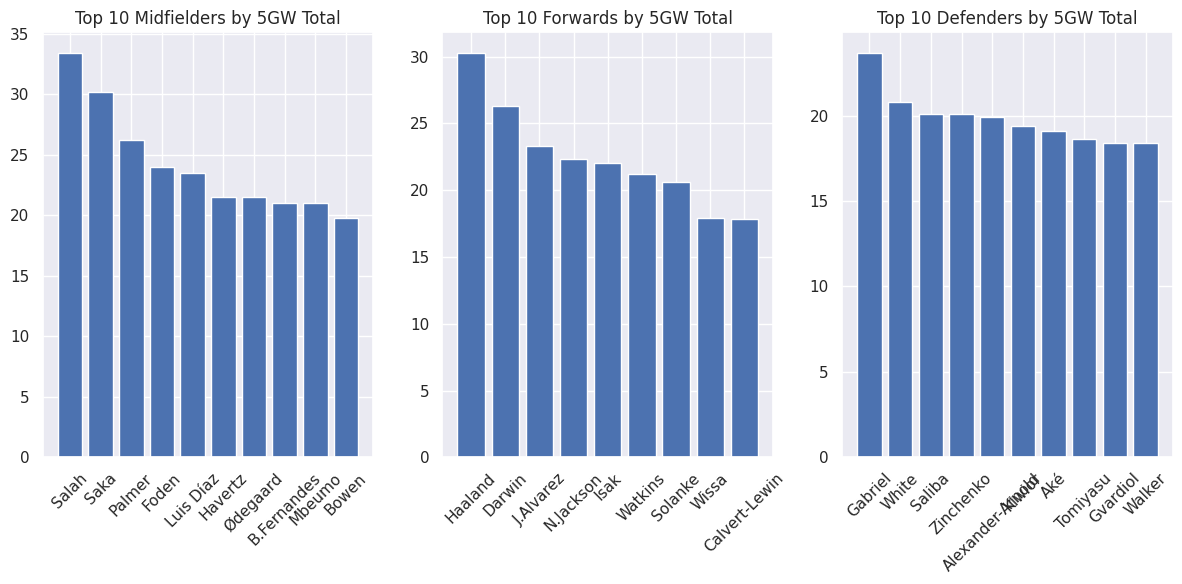

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Midfielders chart
plt.subplot(131)
plt.bar(midfielders['name'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xticks(rotation=45)

# Forwards chart
plt.subplot(132)
plt.bar(forwards['name'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xticks(rotation=45)

# Defenders chart
plt.subplot(133)
plt.bar(defenders['name'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


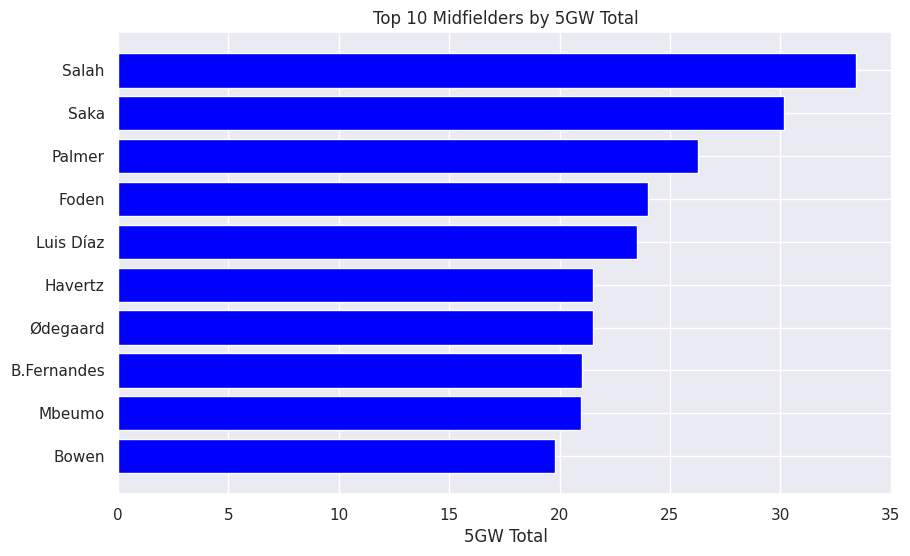

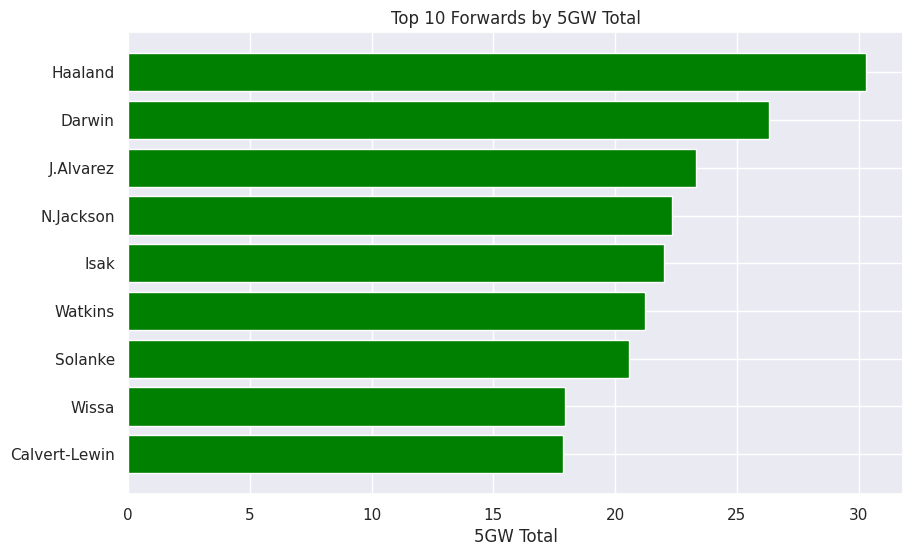

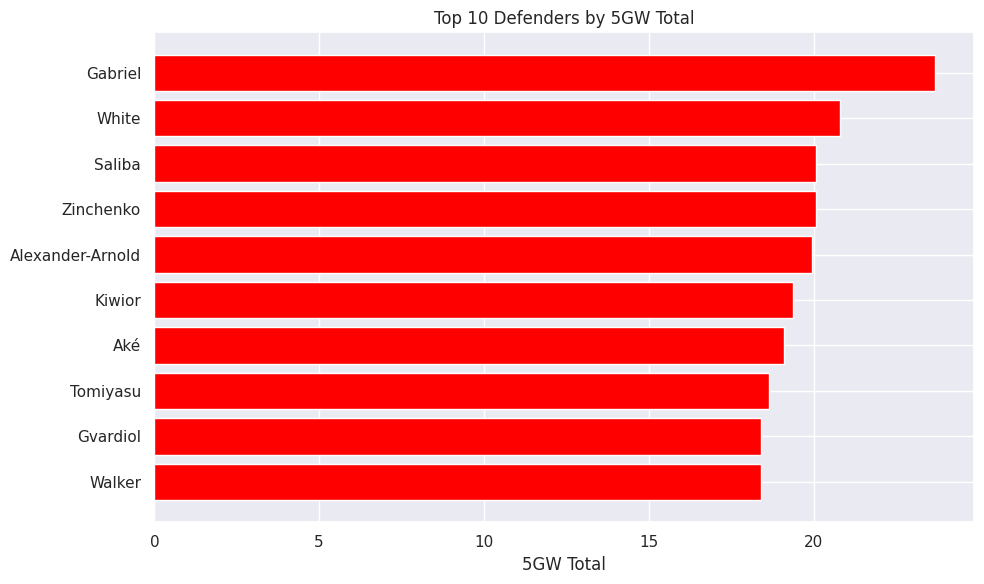

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Create a list of colors for each chart
colors = ['blue', 'green', 'red']

# Plotting the horizontal bar charts with different colors
plt.figure(figsize=(10, 6))

# Midfielders chart
plt.barh(midfielders['name'][:10], midfielders['5GW Total'][:10], color=colors[0])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Forwards chart
plt.figure(figsize=(10, 6))
plt.barh(forwards['name'][:10], forwards['5GW Total'][:10], color=colors[1])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Defenders chart
plt.figure(figsize=(10, 6))
plt.barh(defenders['name'][:10], defenders['5GW Total'][:10], color=colors[2])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

plt.tight_layout()
plt.show()


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Sort the DataFrame by values in descending order
gw25adjustments_sorted = gw25adjustments.sort_values(by=gw25adjustments.columns[0], ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(gw25adjustments_sorted, annot=True, cmap=custom_cmap, center=1,
            vmin=0.9, vmax=1.1, cbar_kws={'ticks': [0.9, 1, 1.1], 'format': '%.1f'})
plt.title('Color-Coded Table of GW Adjustments (Custom Colors)')
plt.show()



NameError: name 'gw25adjustments' is not defined

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments21'

# Sort the DataFrame by values in descending order
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

scores_columns = ['gw21adjustment', 'gw22adjustment', 'gw23adjustment', 'gw24adjustment', 'gw25adjustment']

bottom = [0] * len(gw21adjustments_sorted)

for i, score_col in enumerate(scores_columns):
    plt.bar(gw21adjustments_sorted.index, gw21adjustments_sorted[score_col], bottom=bottom, label=score_col, color=custom_cmap[i])
    bottom += gw21adjustments_sorted[score_col]

plt.xlabel('Teams')
plt.ylabel('Score Adjustments')
plt.title('Stacked GW Adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

In [ ]:
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate the total score adjustments for each team
gw21adjustments['Total'] = gw21adjustments.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gw21adjustments = gw21adjustments.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw22adjustments', 'gw23adjustments', 'gw24adjustments', 'gw25adjustments']

bottom = [0] * len(gw21adjustments)

for score_col in scores_columns:
    plt.bar(gw21adjustments.index, gw21adjustments[score_col], bottom=bottom, label=score_col)
    bottom += gw21adjustments[score_col]

plt.xlabel('Teams')
plt.ylabel('Score adjustments')
plt.title('Stacked GW adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


NameError: name 'gw21adjustments' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
gw23adjustment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Set the index column
gwadjustments26.set_index('team', inplace=True)

# Create a custom color map
cmap = sns.diverging_palette(240, 10, n=21, as_cmap=True)
colors = ['red', 'orange', 'green']

# Define color thresholds
color_thresholds = [0.9, 1.1, 2.0]

# Normalize values for coloring
normalized_values = (gwadjustments26 - 0.9) / (2.0 - 0.9)

# Apply color map and thresholds
colored_values = pd.cut(normalized_values, bins=color_thresholds, labels=colors)

# Plot the heatmap with customized color coding
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_values, annot=True, cmap=cmap, center=1, cbar=False, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Custom Color-Coded Table of GW Adjustments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

# Calculate the total score adjustments for each team
gwadjustments26['Total'] = gwadjustments26.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gwadjustments26 = gwadjustments26.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw2adjustment', 'gw3adjustment', 'gw4adjustment', 'gw5adjustment', 'gw6adjustment']

# Define color thresholds and corresponding colors
color_thresholds = [0.9, 1.1, 2.0]
colors = ['red', 'orange', 'green']

bottom = [0] * len(gwadjustments26)

for score_col in scores_columns:
    adjusted_values = gwadjustments26[score_col]

    # Create a color list based on thresholds
    colors_for_col = [colors[-1] if val is None else
                      colors[0] if val < color_thresholds[0] else
                      colors[1] if val <= color_thresholds[1] else
                      colors[2]
                      for val in adjusted_values]

    for i, (val, color) in enumerate(zip(adjusted_values, colors_for_col)):
        plt.barh(gwadjustments26.index[i], val, color=color, edgecolor='white')

    bottom += adjusted_values

plt.xlabel('Score Adjustments')
plt.ylabel('Teams')
plt.title('Horizontally Stacked GW Adjustments for Different Teams')
plt.legend(labels=scores_columns)
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()


In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 6388102
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()



In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 275269
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()


In [98]:
import pandas as pd

fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc = epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc = epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc = epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc = epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc = epltablexGxGc.replace('Manchester Utd','Manchester United')

epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc = epltablexGxGc.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the new dataframe "XGD current season"
xgd_current_season = epltablexGxGc[['Team', 'xGD']]

# Displaying the new dataframe
xgd_current_season

,Team,xGD
0,Arsenal,40.0
1,Liverpool,34.5
2,Manchester City,32.8
3,Tottenham,4.6
4,Aston Villa,6.7
5,Manchester United,-11.2
6,West Ham,-12.4
7,Newcastle United,5.3
8,Chelsea,13.0
9,Brighton,2.2


In [99]:
import pandas as pd

# Fetching data for XGD current season
fbref_current_season = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable_current_season = fbref_current_season[0]
epltablexGxGc_current_season = epltable_current_season.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leeds United','Leeds')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leicester City','Leicester')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_current_season['Squad'] = epltablexGxGc_current_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_current_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD current season dataframe
xgd_current_season = epltablexGxGc_current_season[['Team', 'xGD/90']]

# Fetching data for XGD Last season
fbref_last_season = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')
epltable_last_season = fbref_last_season[0]
epltablexGxGc_last_season = epltable_last_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leeds United','Leeds')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leicester City','Leicester')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_last_season['Squad'] = epltablexGxGc_last_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_last_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD Last season dataframe
xgd_last_season = epltablexGxGc_last_season[['Team', 'xGD/90']]

# Merging the two dataframes
merged_df = pd.merge(xgd_current_season, xgd_last_season, on='Team', suffixes=('_current', '_last'), how='outer')
merged_df.fillna(0, inplace=True)

# Displaying the merged dataframe
merged_df_filtered = merged_df.copy()

# Drop rows containing "Leicester", "Leeds", and "Southampton" from the filtered DataFrame
merged_df_filtered = merged_df_filtered[~merged_df_filtered['Team'].isin(['Leicester', 'Leeds', 'Southampton'])]
merged_df_filtered

,Team,xGD/90_current,xGD/90_last
0,Arsenal,1.29,0.79
1,Liverpool,1.11,0.57
2,Manchester City,1.06,1.22
3,Tottenham,0.15,0.20
4,Aston Villa,0.21,-0.06
5,Manchester United,-0.36,0.45
6,West Ham,-0.39,-0.10
7,Newcastle United,0.17,0.85
8,Chelsea,0.43,-0.08
9,Brighton,0.07,0.61


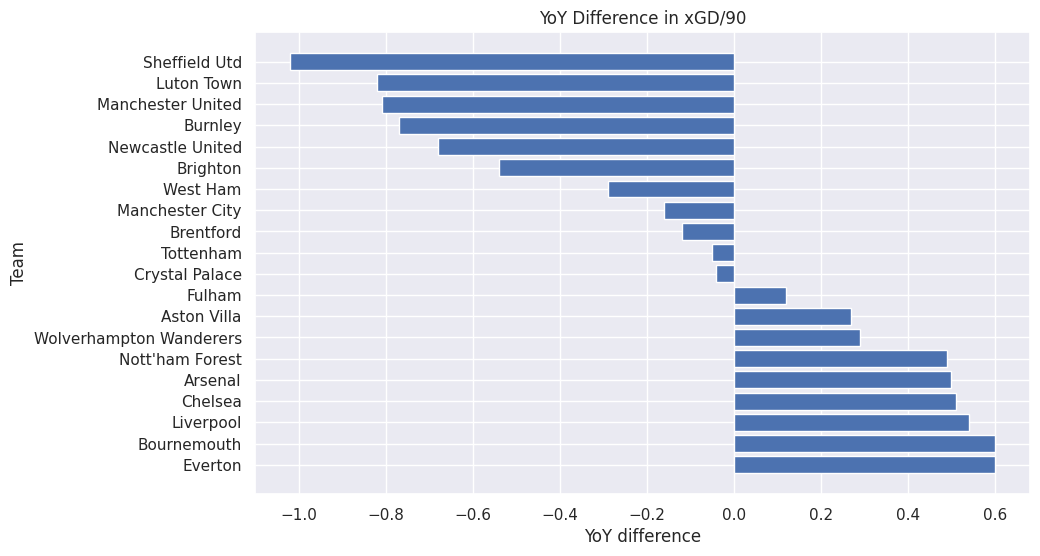

In [100]:
import matplotlib.pyplot as plt

# Create the YoY difference column
merged_df_filtered['YoY difference'] = merged_df_filtered['xGD/90_current'] - merged_df_filtered['xGD/90_last']

# Sort the DataFrame by YoY difference in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('YoY difference', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['YoY difference'])
plt.xlabel('YoY difference')
plt.ylabel('Team')
plt.title('YoY Difference in xGD/90')
plt.show()

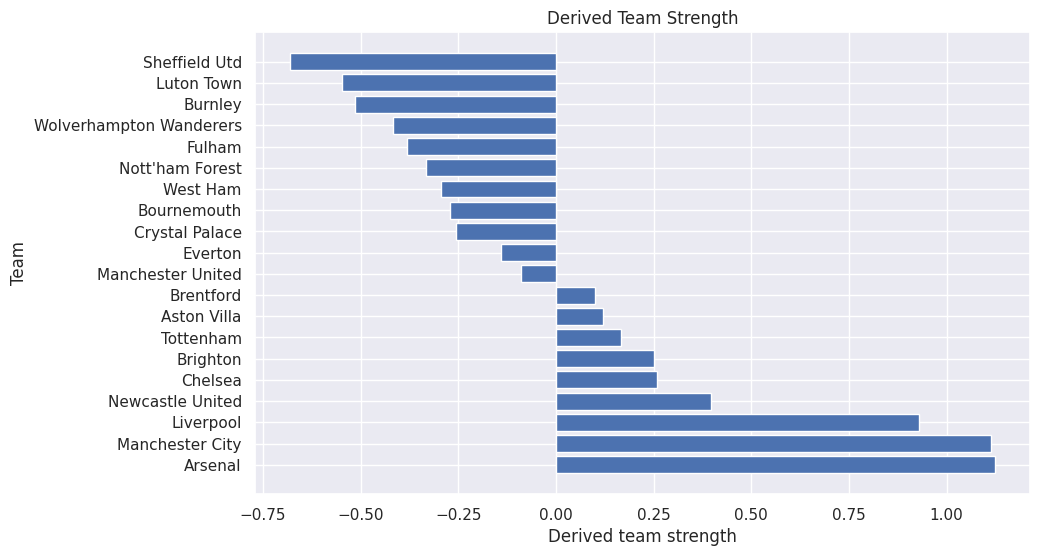

In [101]:
import matplotlib.pyplot as plt

# Create the Derived team strength column
merged_df_filtered['Derived team strength'] = (2/3) * merged_df_filtered['xGD/90_current'] + (1/3) * merged_df_filtered['xGD/90_last']

# Sort the DataFrame by Derived team strength in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('Derived team strength', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['Derived team strength'])
plt.xlabel('Derived team strength')
plt.ylabel('Team')
plt.title('Derived Team Strength')
plt.show()

In [102]:
merged_df_filtered

,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Arsenal,1.29,0.79,0.50,1.123333
1,Liverpool,1.11,0.57,0.54,0.930000
2,Manchester City,1.06,1.22,-0.16,1.113333
3,Tottenham,0.15,0.20,-0.05,0.166667
4,Aston Villa,0.21,-0.06,0.27,0.120000
5,Manchester United,-0.36,0.45,-0.81,-0.090000
6,West Ham,-0.39,-0.10,-0.29,-0.293333
7,Newcastle United,0.17,0.85,-0.68,0.396667
8,Chelsea,0.43,-0.08,0.51,0.260000
9,Brighton,0.07,0.61,-0.54,0.250000


In [103]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    return(player_df)

#Creprint('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Merging Tables')
EPL_player_df = pd.merge(five_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


# Assuming you have a DataFrame named EPL_player_df

# Extract relevant columns
selected_columns = ['player_name', 'xG_5wks_x', 'xA_5wks_x']
subset_df = EPL_player_df[selected_columns]

# Rename columns
subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)

# Round the numbers to 2 decimal places
subset_df = subset_df.round(2)

# Sort by xG 5 Weeks in descending order
top_10_xG = subset_df.sort_values(by='xG 5 Weeks', ascending=False).head(10)

# Sort by xA 5 Weeks in descending order
top_10_xA = subset_df.sort_values(by='xA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 for xG 5 Weeks:")
print(top_10_xG)

# Display the top 10 for xA 5 Weeks
print("\nTop 10 for xA 5 Weeks:")
print(top_10_xA)



Getting data for the whole season
Getting data for last 5 matches
Getting data for the whole season
Getting data for last 5 matches
Merging Tables
Writing CSV File
Top 10 for xG 5 Weeks:
        player_name          xG 5 Weeks           xA 5 Weeks
2    Alexander Isak   4.253462545573711   0.6568240784108639
9     Mohamed Salah   4.145498648285866   1.3521502576768398
1       Cole Palmer  3.8723657429218292    2.904990166425705
3    Elijah Adebayo   3.737639993429184  0.15402574092149734
44  Brennan Johnson  3.7345728278160095   1.2900899425148964
35   Erling Haaland  3.2104114666581154    0.567131370306015
43     Darwin Núñez  2.9231643080711365   0.6728311814367771
14   Rasmus Højlund   2.890929862856865   0.5954637974500656
41        Luis Díaz   2.880989581346512   2.1391928158700466
4        Chris Wood  2.7232914865016937    0.592846155166626

Top 10 for xA 5 Weeks:
            player_name           xG 5 Weeks          xA 5 Weeks
15      Kevin De Bruyne  0.47960180044174194  3.57818

In [104]:
# Extract relevant columns
selected_columns_xG = ['team_name', 'xG_5wks']
selected_columns_xGA = ['team_name', 'xGA_5wks']

# Rename columns
subset_xG = season_df[selected_columns_xG].rename(columns={'xG_5wks': 'xG 5 Weeks'})
subset_xGA = season_df[selected_columns_xGA].rename(columns={'xGA_5wks': 'xGA 5 Weeks'})

# Sort by xG 5 Weeks and xGA 5 Weeks respectively
top_xG = subset_xG.sort_values(by='xG 5 Weeks', ascending=False).head(10)
top_xGA = subset_xGA.sort_values(by='xGA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 teams with the highest xG over the last 5 games:")
print(top_xG)

# Display the top 10 for xGA 5 Weeks
print("\nTop 10 teams with the highest xGA over the last 5 games:")
print(top_xGA)


KeyError: "None of [Index(['team_name', 'xG_5wks'], dtype='object')] are in the [columns]"

In [105]:
import pandas as pd

# Your list of values
values = [0.91, 0.326666667, 1.073333333, 0.93, 0.08, -0.286666667, 0.383333333, 0.036666667, 0.476666667, 0.326666667, -0.416666667, -0.376666667, -0.486666667, -0.21, -0.453333333, 0.32, -0.1, -0.68, -0.566666667, -0.786666667]

# Update the existing dataframe
merged_df_filtered['Derived team strength'] = values

# Set the desired range
new_min = 0.5
new_max = 1.5

# Scale the values
min_value = merged_df_filtered['Derived team strength'].min()
max_value = merged_df_filtered['Derived team strength'].max()

merged_df_filtered['Derived team strength'] = ((merged_df_filtered['Derived team strength'] - min_value) * (new_max - new_min) / (max_value - min_value)) + new_min

# Display the updated dataframe
merged_df_filtered


,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Arsenal,1.29,0.79,0.50,1.412186
1,Liverpool,1.11,0.57,0.54,1.098566
2,Manchester City,1.06,1.22,-0.16,1.500000
3,Tottenham,0.15,0.20,-0.05,1.422939
4,Aston Villa,0.21,-0.06,0.27,0.965950
5,Manchester United,-0.36,0.45,-0.81,0.768817
6,West Ham,-0.39,-0.10,-0.29,1.129032
7,Newcastle United,0.17,0.85,-0.68,0.942652
8,Chelsea,0.43,-0.08,0.51,1.179211
9,Brighton,0.07,0.61,-0.54,1.098566
